#Importing libraries and required image

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage.transform import resize
import math
from skimage.feature import hog
import numpy as np

from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


(512, 512, 3)
(512, 512)
1.0
[[0.86111111 0.86111111 0.86111111 ... 0.86111111 0.86111111 0.86111111]
 [0.86111111 0.86111111 0.86111111 ... 0.86111111 0.86111111 0.86111111]
 [0.86111111 0.86111111 0.86111111 ... 0.86111111 0.86111111 0.86111111]
 ...
 [0.86111111 0.86111111 0.86111111 ... 0.86111111 0.86111111 0.86111111]
 [0.86111111 0.86111111 0.86111111 ... 0.86111111 0.86111111 0.86111111]
 [0.86111111 0.86111111 0.86111111 ... 0.86111111 0.86111111 0.86111111]]


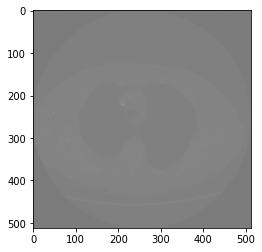

In [ ]:

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('gdrive/My Drive/Colab Notebooks/dcmTOpng/1-0271663269886.png')
print(img.shape)
img = img.astype(np.uint8)
img = img / 255
plt.imshow(img,cmap='gray')

# Show the new shape of the image
image_sum = img.sum(axis=2)
print(image_sum.shape)

# Show the max value at any point.  1.0 = Black, 0.0 = White
image_bw = image_sum/image_sum.max()
print(image_bw.max())
print(image_bw)

In [ ]:
img = resize(color.rgb2gray(io.imread("gdrive/My Drive/Colab Notebooks/dcmTOpng/1-0271663269886.png")), (128, 64))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


#Visualization of image to be used

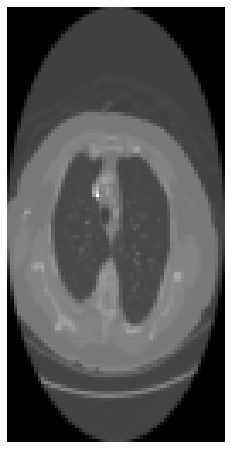

In [ ]:
plt.figure(figsize=(15, 8))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
img = np.array(img)
img

array([[0.48439765, 0.48439765, 0.48439765, ..., 0.48439765, 0.48439765,
        0.48439765],
       [0.48439765, 0.48439765, 0.48439765, ..., 0.48439765, 0.48439765,
        0.48439765],
       [0.48439765, 0.48439765, 0.48439765, ..., 0.48439765, 0.48439765,
        0.48439765],
       ...,
       [0.48439765, 0.48439765, 0.48439765, ..., 0.48439765, 0.48439765,
        0.48439765],
       [0.48439765, 0.48439765, 0.48439765, ..., 0.48439765, 0.48439765,
        0.48439765],
       [0.48439765, 0.48439765, 0.48439765, ..., 0.48439765, 0.48439765,
        0.48439765]])

#Calculating gradient and angle of the image

In [ ]:
mag = []
theta = []
for i in range(128):
  magnitudeArray = []
  angleArray = []
  for j in range(64):
    # Condition for axis 0
    if j-1 <= 0 or j+1 >= 64:
      if j-1 <= 0:
        # Condition if first element
        Gx = img[i][j+1] - 0
      elif j + 1 >= len(img[0]):
        Gx = 0 - img[i][j-1]
    # Condition for first element
    else:
      Gx = img[i][j+1] - img[i][j-1]
    
    # Condition for axis 1
    if i-1 <= 0 or i+1 >= 128:
      if i-1 <= 0:
        Gy = 0 - img[i+1][j]
      elif i +1 >= 128:
        Gy = img[i-1][j] - 0
    else:
      Gy = img[i-1][j] - img[i+1][j]

    # Calculating magnitude
    magnitude = math.sqrt(pow(Gx, 2) + pow(Gy, 2))
    magnitudeArray.append(round(magnitude, 9))

    # Calculating angle
    if Gx == 0:
      angle = math.degrees(0.0)
    else:
      angle = math.degrees(abs(math.atan(Gy / Gx)))
    angleArray.append(round(angle, 9))
  mag.append(magnitudeArray)
  theta.append(angleArray)

In [ ]:
mag = np.array(mag)
mag

array([[0.68504173, 0.68504173, 0.48439765, ..., 0.48439765, 0.48439765,
        0.68504173],
       [0.68504173, 0.68504173, 0.48439765, ..., 0.48439765, 0.48439765,
        0.68504173],
       [0.48439765, 0.48439765, 0.        , ..., 0.        , 0.        ,
        0.48439765],
       ...,
       [0.48439765, 0.48439765, 0.        , ..., 0.        , 0.        ,
        0.48439765],
       [0.48439765, 0.48439765, 0.        , ..., 0.        , 0.        ,
        0.48439765],
       [0.68504173, 0.68504173, 0.48439765, ..., 0.48439765, 0.48439765,
        0.68504173]])

In [ ]:
theta = np.array(theta)
theta

array([[45., 45.,  0., ...,  0.,  0., 45.],
       [45., 45.,  0., ...,  0.,  0., 45.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [45., 45.,  0., ...,  0.,  0., 45.]])

#Visualization of magnitude of the image

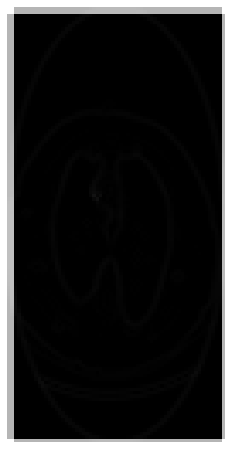

In [21]:
plt.figure(figsize=(15, 8))
plt.imshow(mag, cmap="gray")
plt.axis("off")
plt.show()

#Visualization of angle of the image

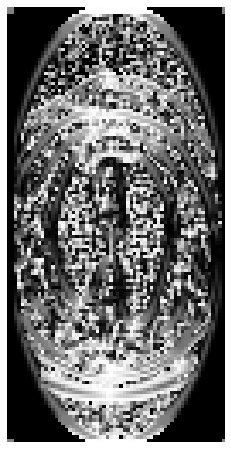

In [ ]:
plt.figure(figsize=(15, 8))
plt.imshow(theta, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
number_of_bins = 9
step_size = 180 / number_of_bins

##Function to calculate the $j^{th}$ bin

In [ ]:
def calculate_j(angle):
  temp = (angle / step_size) - 0.5
  j = math.floor(temp)
  return j

##Function to calculate the value of centre of $j^{th}$ bin

In [ ]:
def calculate_Cj(j):
  Cj = step_size * (j + 0.5)
  return round(Cj, 9)

##Function to calculate the value of $j^{th}$ bin

In [ ]:
def calculate_value_j(magnitude, angle, j):
  Cj = calculate_Cj(j+1)
  Vj = magnitude * ((Cj - angle) / step_size)
  return round(Vj, 9)

#Provides a 9 point histogram for 8x8 cells

In [ ]:
histogram_points_nine = []
for i in range(0, 128, 8):
  temp = []
  for j in range(0, 64, 8):
    magnitude_values = [[mag[i][x] for x in range(j, j+8)] for i in range(i,i+8)]
    angle_values = [[theta[i][x] for x in range(j, j+8)] for i in range(i, i+8)]
    for k in range(len(magnitude_values)):
      for l in range(len(magnitude_values[0])):
        bins = [0.0 for _ in range(number_of_bins)]
        value_j = calculate_j(angle_values[k][l])
        Vj = calculate_value_j(magnitude_values[k][l], angle_values[k][l], value_j)
        Vj_1 = magnitude_values[k][l] - Vj
        bins[value_j]+=Vj
        bins[value_j+1]+=Vj_1
        bins = [round(x, 9) for x in bins]
    temp.append(bins)
  histogram_points_nine.append(temp)

In [ ]:
print(len(histogram_points_nine))
print(len(histogram_points_nine[0]))
print(len(histogram_points_nine[0][0]))

16
8
9


#Provides a HOG feature vector for the 9 point histogram provided by making block from 2x2 blocks
##(1 block is made up of 8x8 cells)

In [ ]:
epsilon = 1e-05

In [ ]:
feature_vectors = []
for i in range(0, len(histogram_points_nine) - 1, 1):
  temp = []
  for j in range(0, len(histogram_points_nine[0]) - 1, 1):
    values = [[histogram_points_nine[i][x] for x in range(j, j+2)] for i in range(i, i+2)]
    final_vector = []
    for k in values:
      for l in k:
        for m in l:
          final_vector.append(m)
    k = round(math.sqrt(sum([pow(x, 2) for x in final_vector])), 9)
    final_vector = [round(x/(k + epsilon), 9) for x in final_vector]
    temp.append(final_vector)
  feature_vectors.append(temp)

In [ ]:
print(len(feature_vectors))
print(len(feature_vectors[0]))
print(len(feature_vectors[0][0]))

print("\n HOG Feature Vector: ", feature_vectors)

15
7
36

 HOG Feature Vector:  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.860373947, 0.504388656, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003188646, 0.009566462, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.860367619, 0.504384946, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002505346, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002505346, 0.0, 0.003188622, 0.009566392, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001002191, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001002191], [0.260424347, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.260424347, 0.120013107, 0.578766282, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1041752, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1041752, 0.1041752, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1041752], [0.125625268, 0.60583107, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.041875089, 0.20194369, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.109046734, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.109046734, 0.199371159, 0.145433757, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.000102448, 0.000494058

#Number of HOG features obtained

In [ ]:
print(f'Number of HOG features = {len(feature_vectors) * len(feature_vectors[0]) * len(feature_vectors[0][0])}')

Number of HOG features = 3780
